# Tornado Data - Machine Learning: Regression Analysis

In [80]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [81]:
# Import data
path = r'C:\Users\lydia\OneDrive\Documents\Career Foundry Data\Data Immersion\Acheivement 6\Prepared Data'
df = pd.read_csv(os.path.join(path, 'Tornado Data.csv'), index_col = False)

In [82]:
df.head()

,Unnamed: 0,year,month,day,date,states,mag,injuries,deaths,starting lat,starting lon,ending lat,ending lon,length in miles,width in yards,wind speed,potential damage
0,0,1950,1,3,1950-01-03,Illinois,3.0,3,0,39.10,-89.30,39.12,-89.23,3.6,130,136-165 mph,Severe damage
1,1,1950,1,3,1950-01-03,Missouri,3.0,3,0,38.77,-90.22,38.83,-90.03,9.5,150,136-165 mph,Severe damage
2,2,1950,1,3,1950-01-03,Ohio,1.0,1,0,40.88,-84.58,0.00,0.00,0.1,10,85-110 mph,Moderate damage
3,3,1950,1,13,1950-01-13,Arkansas,3.0,1,1,34.40,-94.37,0.00,0.00,0.6,17,136-165 mph,Severe damage
4,4,1950,1,25,1950-01-25,Illinois,2.0,0,0,41.17,-87.33,0.00,0.00,0.1,100,111-135 mph,Considerable damage


#### Removing unneccessary columns

In [83]:
df = df.drop(columns = ['Unnamed: 0'])

#### Addressing missing values

In [84]:
df.isnull().sum()

year                  0
month                 0
day                   0
date                  0
states                0
mag                 605
injuries              0
deaths                0
starting lat          0
starting lon          0
ending lat            0
ending lon            0
length in miles       0
width in yards        0
wind speed          605
potential damage    605
dtype: int64

Missing values for magnitude, windspeed and potential damage to be left - they refer to tornadoes that occurred but this information is unknown

## 1. First Regression Analysis

##### Hypothesis: The greater the length in miles of the tornado, the greater the number of deaths.

### Data Prep for Regression Analysis

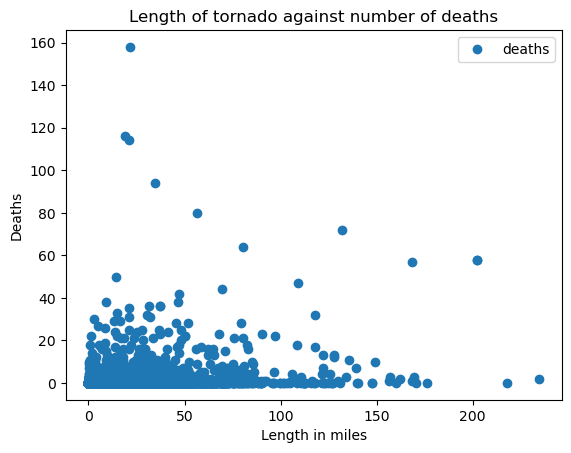

In [85]:
# Create a scatterplot

df.plot(x = 'length in miles', y='deaths',style='o') 
plt.title('Length of tornado against number of deaths')  
plt.xlabel('Length in miles')  
plt.ylabel('Deaths')  
plt.show()

In [86]:
# Reshape the variables into NumPy arrays and put them into separate objects.

x = df['length in miles'].values.reshape(-1,1)
y = df['deaths'].values.reshape(-1,1)

In [87]:
x

array([[3.6 ],
       [9.5 ],
       [0.1 ],
       ...,
       [0.95],
       [2.75],
       [2.5 ]])

In [88]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [89]:
# Split data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Regression Analysis

In [90]:
# Create a regression object.

regression = LinearRegression()

In [91]:
# Fit the regression object onto the training set.

regression.fit(x_train, y_train)

LinearRegression()

In [92]:
# Predict the values of y using X.

y_predicted = regression.predict(x_test)

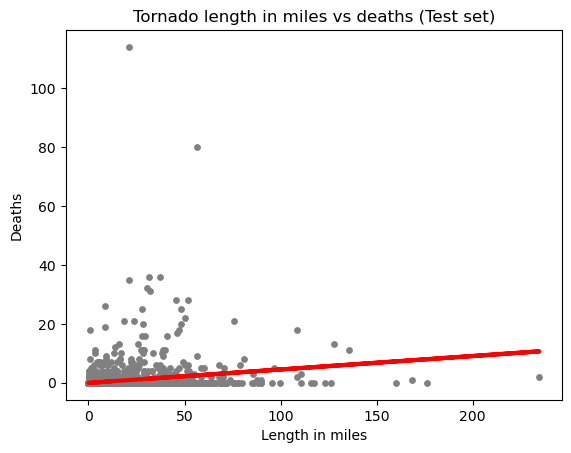

In [93]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Tornado length in miles vs deaths (Test set)')
plot_test.xlabel('Length in miles')
plot_test.ylabel('Deaths')
plot_test.show()

In [94]:
# Model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # Mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score. 

In [95]:
# Assess performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04567717]]
Mean squared error:  1.8643474245717873
R2 score:  0.04205766646894715


In [96]:
y_predicted

array([[ 0.42612565],
       [ 0.02964782],
       [-0.06581746],
       ...,
       [-0.00186943],
       [ 0.10318806],
       [ 1.2222787 ]])

In [97]:
# Dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.tail(30)

,Actual,Predicted
20099,0,-0.065817
20100,0,-0.024708
20101,0,-0.024708
20102,0,-0.024708
20103,0,-0.042065
20104,1,0.331574
20105,1,0.112323
20106,0,-0.065817
20107,0,-0.024708
20108,0,-0.065817


### Compare how the regression fits the training set

In [98]:
# Predict X train

y_predicted_train = regression.predict(x_train)

In [99]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [100]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04567717]]
Mean squared error:  2.1896025774492247
R2 score:  0.06185253844663896


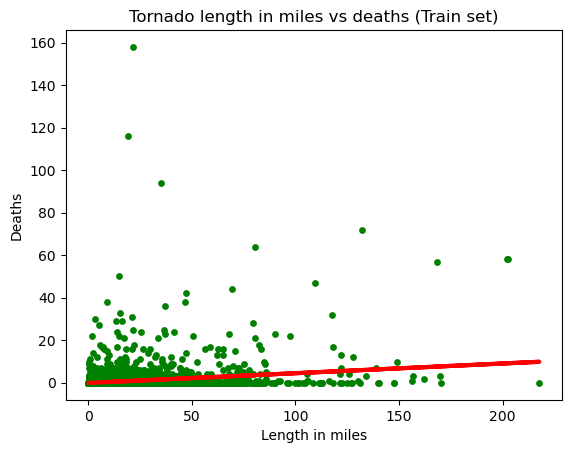

In [101]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Tornado length in miles vs deaths (Train set)')
plot_test.xlabel('Length in miles')
plot_test.ylabel('Deaths')
plot_test.show()

From the regression analysis, I think this is a poor model for predicting the number of deaths based upon the legnth of the tornado. This is because it has R squared values of 0.06 and 0.04 from the training set and testing set respectively.

## 2. Second Regression Analysis

##### Hypothesis: The lower the latitude, the greater the number of tornado deaths. 

### Data Prep for Regression Analysis

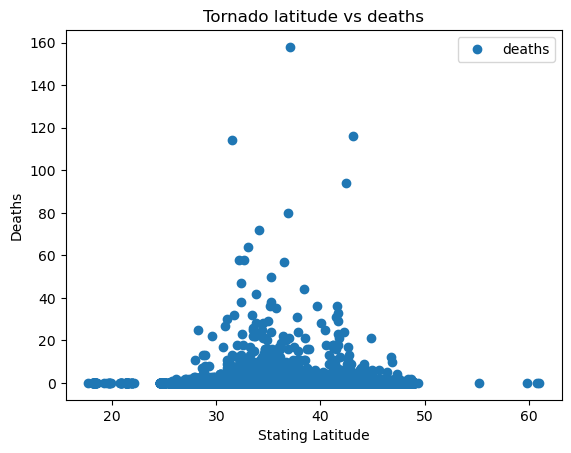

In [102]:
# Create a scatterplot using matplotlib.

df.plot(x = 'starting lat', y='deaths',style='o')
plt.title('Tornado latitude vs deaths')  
plt.xlabel('Stating Latitude')  
plt.ylabel('Deaths')  
plt.show()

In [103]:
# Reshape the variables into NumPy arrays and put them into separate objects.

x1 = df['starting lat'].values.reshape(-1,1)
y1 = df['deaths'].values.reshape(-1,1)

In [104]:
x1

array([[39.1   ],
       [38.77  ],
       [40.88  ],
       ...,
       [34.2875],
       [33.7372],
       [33.5676]])

In [105]:
y1

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [106]:
# Split data into a training set and a test set.

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

### Regression Analysis

In [107]:
# Create a regression object.

regression = LinearRegression()

In [108]:
# Fit the regression object onto the training set.

regression.fit(x1_train, y1_train)

LinearRegression()

In [109]:
# Predict the values of y using x.

y1_predicted = regression.predict(x1_test)

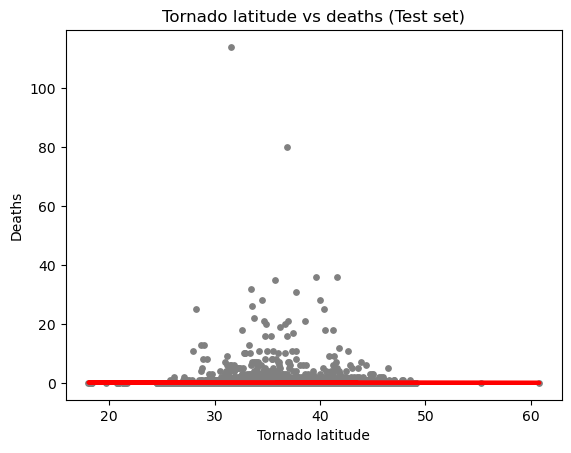

In [110]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x1_test, y1_test, color='gray', s = 15)
plot_test.plot(x1_test, y1_predicted, color='red', linewidth =3)
plot_test.title('Tornado latitude vs deaths (Test set)')
plot_test.xlabel('Tornado latitude')
plot_test.ylabel('Deaths')
plot_test.show()

In [111]:
# Model summary statistics.

rmse = mean_squared_error(y1_test, y1_predicted) # Mean squared error
r2 = r2_score(y1_test, y1_predicted) # R2 score. 

In [112]:
# Assess the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00258971]]
Mean squared error:  1.9457942425481558
R2 score:  0.0002085165505075759


This is a very poor model for predicting the number of deaths based on the very low R2 score.

In [113]:
y1_predicted

array([[0.09176245],
       [0.08365872],
       [0.07518465],
       ...,
       [0.10162564],
       [0.07647951],
       [0.07249135]])

In [114]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.091762
1,0,0.083659
2,0,0.075185
3,0,0.104789
4,0,0.086036
5,0,0.106028
6,0,0.103050
7,0,0.092484
8,0,0.064722
9,0,0.061148


### Compare how the regression fits the training set

In [115]:
# Predict.

y1_predicted_train = regression.predict(x1_train)

In [116]:
rmse = mean_squared_error(y1_train, y1_predicted_train)
r2 = r2_score(y1_train, y1_predicted_train)

In [117]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00258971]]
Mean squared error:  2.333790470014544
R2 score:  7.443004010554422e-05


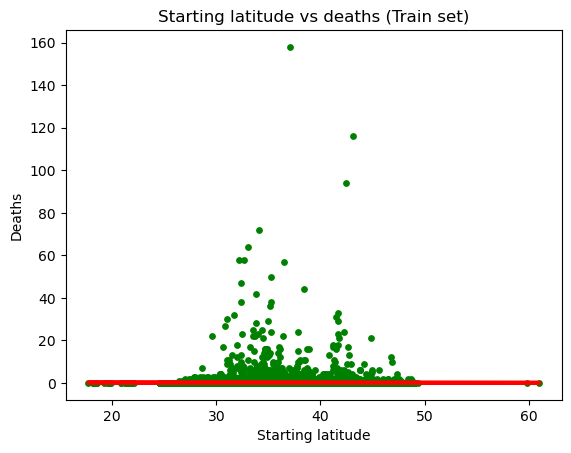

In [118]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(x1_train, y1_train, color='green', s = 15)
plot_test.plot(x1_train, y1_predicted_train, color='red', linewidth =3)
plot_test.title('Starting latitude vs deaths (Train set)')
plot_test.xlabel('Starting latitude')
plot_test.ylabel('Deaths')
plot_test.show()